# Pi Filter

![Pi filter schematic](Pi-Filter.png){#fig-pi-filter}  

## Introduction
A question posted on [Electronics Stackexchange](https://electronics.stackexchange.com/questions/681002/how-to-find-transfer-function-for-this-pi-filter-using-facts-method-with-6-react/681087#681087) by @user15174 looked interesting, he asked:

>Am trying to apply the FACTS method to find out the transfer function for this circuit as shown below. This is a Pi-filter circuit with all its component parasitics and also including the source and load resistances. I would like to find out the transfer function of this circuit and match its plot from Mathcad with simulation.

>First, to find out the zeros of this transfer function by inspection, I placed all circuit elements in its high frequency state. I can observe the response Vout is still present. In that case, can I assume that this circuit has 6 zeros associated with it?

>But as per the answer provided in this link, we have to place the other associated circuit element in its DC state and observe if the response is still present. Since this circuit has around 6 reactive elements, how do I decide which circuit element should be in DC State and which circuit element should be in high frequency state?

>I was able to follow some examples done based on 2nd and 3rd order circuits shared in the above links. But with this circuit configuration and so many reactive elements, frankly I am lost.
It would be great if you could share some insight on how to derive the transfer function for this circuit including its poles and zeros.

The FACTS (Fast Analytical Circuits Techniques) method refers to a circuit analysis technique that enables engineers to obtain the transfer functions and input and output impedances of a circuit by inspection without resorting to too much algebra. The circuits offered as illustrations of the technique are small with one or two reactive elements. @Middlebrook1991 seems to have been the first proponent of the method and describes what he calls design oriented analysis. He talks about low entropy equations, in which the terms and elements are ordered or grouped in such a way that their physical origin, where they come from in the circuit, and what part of the circuit contributes to this part of the final expression becomes obvious. The method is also described in @Middlebrook1992.

## Community answers
There were two answers provided by the community. User @user347817 provided a detailed solution based on reducing the circuit to Z1, Z2 and Z3 as shown in @fig-pi-filter-franc and then substituting back into the transfer function the impedances for each of the Z's. User Telsa23 provided a shorter answer, also based on reducing the circuit to Z1, Z2 and Z3, but where a different expression for the transfer function was obtained. Neither of these answers follow the FACTS method, since the [Extra Element Theorem](https://en.wikipedia.org/wiki/Extra_element_theorem) was not employed during the analysis.

## Circuit description
@fig-pi-filter shows the schematic as I re-drew it in LTSpice with all the values set to one. I numbered each of the nodes and made some changes to the reference designators. In the original question, no component values were provided. @user15174 stated that component parasitics are included, but he didn't indicate which circuit elements he considered parasitic. I'm going to consider C1, L3 and C2 as the main components of the Pi-Filter. $R_{in}$ and $R_{out}$ are the source and load impedances. All other elements in the schematic are parasitic and the values will be assigned later in the analysis.
 
With C1, L3 and C2 being considered as the main components, the circuit is a three section low pass filter, sometimes called a Pi filter because the connection represents the greek letter $\pi$. The schematic in @fig-pi-filter has 13 branches and 8 nodes.  

## Circuit analysis
@user15174 asked for a FACTS analysis. However, I think the circuit has too many reactive components for a FACTS analysis since this is a 6th order circuit. Following my review of FACTS, I present a 'brute force' analysis followed by a rework of @user347817's solution. A MNA of the filter with the parasitic components removed is presented. This is a third order circuit and SymPy can obtain solutions for the poles of the transfer function.

## FACTS
The origin of the FACTS circuit analysis method, as stated above, is from @Middlebrook1991. [IEEE](https://www.ieee.org/) technical papers and books by @basso2016 and @Vorpérian2002 have been written on the subject, however these are not free or available to download for free. FACTS is a circuit analysis method where the transfer function is determined by applying the Extra Element Theorem. Christophe Basso, Vatché Vorpérian and others have open source content available:

- [Fast Analytical Techniques for Electrical and Electronic Circuits](https://www.youtube.com/watch?v=uir9Js1l_r8)
- [Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling](https://www.powersimtof.com/Downloads/PPTs/Chris%20Basso%20APEC%20seminar%202016.pdf)
- A series of 21 YouTube videos starting with: [Fast Analytical Techniques for Electrical and Electronic Circuits](https://www.youtube.com/watch?v=uir9Js1l_r8)
- [Extra Element Theorem: An Introduction (with Examples)](https://www.edn.com/middlebrooks-extra-element-theorem/)

According to the open source FACTS literature:

>The well-known and widely used methods of nodal or loop analysis, while effective for obtaining numerical solutions, are largely ineffective for deriving analytical solutions in symbolic form, except for simple circuits. Attempting to invert a matrix with symbolic entries, even for low-order matrices, results in tedious algebra and complex, high-entropy expressions that provide little meaningful insight.

The FACTS procedure, as illustrated in the open source literature, employs example circuits that are usually of order 1 or 2. The procedure results in equations that keep circuit elements grouped together and thus the equations are more intuitive. For 3rd order and higher circuits, the procedure becomes rather involved and I didn't see any circuit analysis examples beyond a 2nd order circuit.

Traditional circuit analysis techniques usually don't produce analytical answers, i.e. equations in terms of symbols. Both the FACTS procedure and the MNA Python code in this book yield analytical answers, with the FACTS results possibly being more intuitive and the MNA Python code providing an automated solution, which would then have to be algebraically manipulated to be put into a FACTS type solution. The circuit in question is a 6th order network and much too difficult to analyze by hand or with the FACTS method.

## 'Brute Force' MNA procedure
Doing a so called brute force analysis. The goal is to get the transfer function, $H(s)=\frac {V_2}{V_8}$ and the poles and zeros of $H(s)$. SymPy will be used to 'brute force' analyze the circuit and solve for the transfer function and find the poles and zeros. 

The net list for the filter is:
```
V1 8 0 1
R_in 1 8 1
R1 1 4 1
Ra 3 1 1
R2 2 3 1
R3 2 6 1
R_out 2 0 1
L1 4 5 1 Rser=0
L2 3 2 1 Rser=0
L3 6 7 1 Rser=0
C1 5 0 1
C2 2 3 1
C3 7 0 1
```

The following Python modules are used in this notebook.

In [1]:
from sympy import *
import numpy as np
from tabulate import tabulate
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

Load the netlist generated from @fig-pi-filter.

In [73]:
net_list = '''
V1 8 0 1
R_in 1 8 1
R1 1 4 1
Ra 3 1 1
R2 2 3 1
R3 2 6 1
R_out 2 0 1
L1 4 5 1 
L2 3 2 1 
L3 6 7 1
C1 5 0 1
C2 2 3 1
C3 7 0 1
'''

Call the symbolic modified nodal analysis function.

In [74]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

Build the network equations.

In [75]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = v_{1} \cdot \left(\frac{1}{Ra} + \frac{1}{R_{in}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{Ra} - \frac{v_{8}}{R_{in}} - \frac{v_{4}}{R_{1}}$<br>$0 = - I_{L2} + v_{2} \left(C_{2} s + \frac{1}{R_{out}} + \frac{1}{R_{3}} + \frac{1}{R_{2}}\right) + v_{3} \left(- C_{2} s - \frac{1}{R_{2}}\right) - \frac{v_{6}}{R_{3}}$<br>$0 = I_{L2} + v_{2} \left(- C_{2} s - \frac{1}{R_{2}}\right) + v_{3} \left(C_{2} s + \frac{1}{Ra} + \frac{1}{R_{2}}\right) - \frac{v_{1}}{Ra}$<br>$0 = I_{L1} - \frac{v_{1}}{R_{1}} + \frac{v_{4}}{R_{1}}$<br>$0 = C_{1} s v_{5} - I_{L1}$<br>$0 = I_{L3} - \frac{v_{2}}{R_{3}} + \frac{v_{6}}{R_{3}}$<br>$0 = C_{3} s v_{7} - I_{L3}$<br>$0 = I_{V1} - \frac{v_{1}}{R_{in}} + \frac{v_{8}}{R_{in}}$<br>$V_{1} = v_{8}$<br>$0 = - I_{L1} L_{1} s + v_{4} - v_{5}$<br>$0 = - I_{L2} L_{2} s - v_{2} + v_{3}$<br>$0 = - I_{L3} L_{3} s + v_{6} - v_{7}$<br>

As shown above, MNA generated many equations and these would be difficult to solve by hand and a symbolic soultion would take a lot of computing time.

Turn the free symbols into SymPy variables.

In [76]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Generate the symbolic solution, which takes a couple of minutes on my laptop (i3-8130U 2.20GHz).

In [77]:
U_sym = solve(NE_sym,X)

Display the symbolic solution. The espressions are long, so code to display is commented.

In [78]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

# Markdown(temp)

Solve for the transfer function $H(s)=\frac {V_2}{V_8}$ in symbolic form. As you can see the expression is long. 

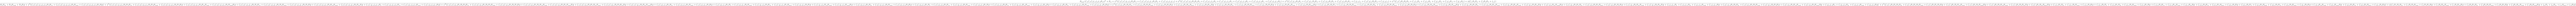

In [79]:
H_sym = (U_sym[v2]/U_sym[v8]).simplify().collect(s)
H_sym

As shown above the symbolic solution is long on not very insightful. The FACTS method is supposed to reveal aspects of the circuit's operation that is hidden by the algebra. I think the Pi Filter with parasitic elements included is too complex.

The numerator and denominator of the transfer function can be extracted for analysis. 

In [80]:
n, d = fraction(H_sym)
display('numerator', n, 'denominator', d)

'numerator'

'denominator'

Solve for the roots of the numerator.

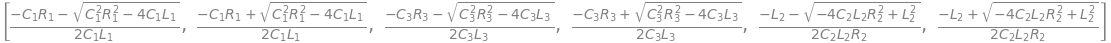

In [81]:
solve(n,s)

We can see that there are six zeros in the transfer function. Here can see what components are influncing the zeros. One of the gaols of the FACTS method was to determine the zeros of the network and express them in terms of the components.

Solve for the roots of the denominator

In [82]:
#solve(d,s)

SymPy could not find a solution for roots of denominator.

### Use numerical values for components

Built a dictionary of element values. The LTSpice schematic had all the component values set to one.

In [83]:
element_values = SymMNA.get_part_values(network_df)
element_values

In this analysis, we are going to assum that the circuit is a low pass filter and the parasitics component values are scalled by 1000 from the value of the main components.

In [84]:
# the values of the main components 
Ca = 1 
Cb = 1
La = 2
sf = 1e3 # parasitic scale factor

element_values[R1] = Ca/sf
element_values[Ra] = La/sf
element_values[R2] = La*sf
element_values[R3] = Cb/sf

element_values[L1] = Ca/sf
element_values[L2] = La
element_values[L3] = Cb/sf
element_values[C1] = Ca
element_values[C2] = La/sf
element_values[C3] = Cb

element_values

### Numerical solution

Display the equations with component values.

In [85]:
NE = NE_sym.subs(element_values)

temp = ''
for i in range(shape(NE.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE.rhs[i]),latex(NE.lhs[i]))

Markdown(temp)

$0 = 1501.0 v_{1} - 500.0 v_{3} - 1000.0 v_{4} - 1.0 v_{8}$<br>$0 = - I_{L2} + v_{2} \cdot \left(0.002 s + 1001.0005\right) + v_{3} \left(- 0.002 s - 0.0005\right) - 1000.0 v_{6}$<br>$0 = I_{L2} - 500.0 v_{1} + v_{2} \left(- 0.002 s - 0.0005\right) + v_{3} \cdot \left(0.002 s + 500.0005\right)$<br>$0 = I_{L1} - 1000.0 v_{1} + 1000.0 v_{4}$<br>$0 = - I_{L1} + s v_{5}$<br>$0 = I_{L3} - 1000.0 v_{2} + 1000.0 v_{6}$<br>$0 = - I_{L3} + s v_{7}$<br>$0 = I_{V1} - 1.0 v_{1} + 1.0 v_{8}$<br>$1.0 = v_{8}$<br>$0 = - 0.001 I_{L1} s + v_{4} - v_{5}$<br>$0 = - 2 I_{L2} s - v_{2} + v_{3}$<br>$0 = - 0.001 I_{L3} s + v_{6} - v_{7}$<br>

Solve for voltages and currents and display the results.

In [86]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = \frac{2004.0 s^{6} + 1008509.0 s^{5} + 1006517006.0 s^{4} + 3012013501.0 s^{3} + 1005009503000.0 s^{2} + 1002503000000.0 s + 501000000000.0}{4004.0 s^{6} + 5017009.0 s^{5} + 2020025006.0 s^{4} + 1009025015001.0 s^{3} + 2011013003000.0 s^{2} + 2005003000000.0 s + 1001000000000.0}$<br>$v_{2} = \frac{2000.0 s^{6} + 4500.0 s^{5} + 4503000.0 s^{4} + 6000500.0 s^{3} + 3001500000.0 s^{2} + 1500000000.0 s + 500000000000.0}{4004.0 s^{6} + 5017009.0 s^{5} + 2020025006.0 s^{4} + 1009025015001.0 s^{3} + 2011013003000.0 s^{2} + 2005003000000.0 s + 1001000000000.0}$<br>$v_{3} = \frac{2000.0 s^{6} + 1004500.0 s^{5} + 1006503000.0 s^{4} + 3007000500.0 s^{3} + 1005001500000.0 s^{2} + 1001500000000.0 s + 500000000000.0}{4004.0 s^{6} + 5017009.0 s^{5} + 2020025006.0 s^{4} + 1009025015001.0 s^{3} + 2011013003000.0 s^{2} + 2005003000000.0 s + 1001000000000.0}$<br>$v_{4} = \frac{2004.0 s^{6} + 1006505.0 s^{5} + 1005510501.0 s^{4} + 2008507000.0 s^{3} + 1004007501000.0 s^{2} + 1002002000000.0 s + 501000000000.0}{4004.0 s^{6} + 5017009.0 s^{5} + 2020025006.0 s^{4} + 1009025015001.0 s^{3} + 2011013003000.0 s^{2} + 2005003000000.0 s + 1001000000000.0}$<br>$v_{5} = \frac{2004000.0 s^{4} + 1006505000.0 s^{3} + 1003506501000.0 s^{2} + 1002002000000.0 s + 501000000000.0}{4004.0 s^{6} + 5017009.0 s^{5} + 2020025006.0 s^{4} + 1009025015001.0 s^{3} + 2011013003000.0 s^{2} + 2005003000000.0 s + 1001000000000.0}$<br>$v_{6} = \frac{2000.0 s^{6} + 2500.0 s^{5} + 4500500.0 s^{4} + 3500000.0 s^{3} + 3000500000.0 s^{2} + 1000000000.0 s + 500000000000.0}{4004.0 s^{6} + 5017009.0 s^{5} + 2020025006.0 s^{4} + 1009025015001.0 s^{3} + 2011013003000.0 s^{2} + 2005003000000.0 s + 1001000000000.0}$<br>$v_{7} = \frac{2000000.0 s^{4} + 2500000.0 s^{3} + 2500500000.0 s^{2} + 1000000000.0 s + 500000000000.0}{4004.0 s^{6} + 5017009.0 s^{5} + 2020025006.0 s^{4} + 1009025015001.0 s^{3} + 2011013003000.0 s^{2} + 2005003000000.0 s + 1001000000000.0}$<br>$v_{8} = 1.0$<br>$I_{V1} = \frac{- 2000.0 s^{6} - 4008500.0 s^{5} - 1013508000.0 s^{4} - 1006013001500.0 s^{3} - 1006003500000.0 s^{2} - 1002500000000.0 s - 500000000000.0}{4004.0 s^{6} + 5017009.0 s^{5} + 2020025006.0 s^{4} + 1009025015001.0 s^{3} + 2011013003000.0 s^{2} + 2005003000000.0 s + 1001000000000.0}$<br>$I_{L1} = \frac{2004000.0 s^{5} + 1006505000.0 s^{4} + 1003506501000.0 s^{3} + 1002002000000.0 s^{2} + 501000000000.0 s}{4004.0 s^{6} + 5017009.0 s^{5} + 2020025006.0 s^{4} + 1009025015001.0 s^{3} + 2011013003000.0 s^{2} + 2005003000000.0 s + 1001000000000.0}$<br>$I_{L2} = \frac{500000.0 s^{2} + 500000.0 s + 500000000.0}{4004.0 s^{4} + 1009005.0 s^{3} + 1006007001.0 s^{2} + 1003002000.0 s + 1001000000.0}$<br>$I_{L3} = \frac{2000000.0 s^{5} + 2500000.0 s^{4} + 2500500000.0 s^{3} + 1000000000.0 s^{2} + 500000000000.0 s}{4004.0 s^{6} + 5017009.0 s^{5} + 2020025006.0 s^{4} + 1009025015001.0 s^{3} + 2011013003000.0 s^{2} + 2005003000000.0 s + 1001000000000.0}$<br>

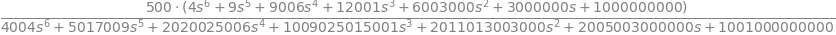

In [87]:
H = (U[v2]/U[v8]).nsimplify().simplify().expand().together()
H

The code below converst the SymPy equations into NumPy format. Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [88]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [89]:
# convert symbolic to NumPy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

### Poles and zeros of the low pass transfer function
The poles and zeros of the transfer function can easly be obtained and plotted with the following code:

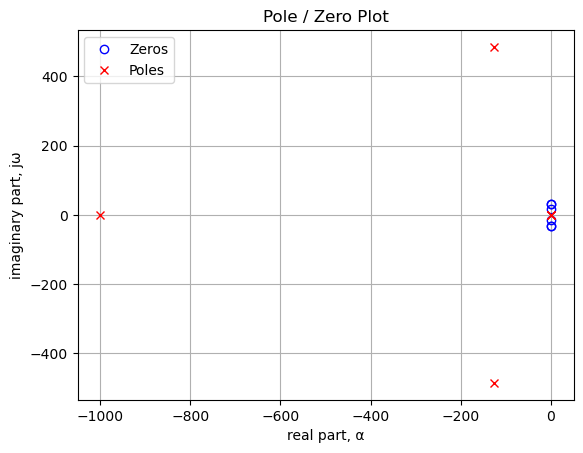

In [90]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

# plot the poles and zeros
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
#plt.ylim((-2,2))
#plt.xlim((-4,0))
plt.grid()
plt.show()

Printing the value of the poles and zeros in radians per second.

In [91]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.3f} rad/s'.format(i))

number of zeros: 6
-0.500+31.619j rad/s
-0.500-31.619j rad/s
-0.500+31.619j rad/s
-0.500-31.619j rad/s
-0.125+15.811j rad/s
-0.125-15.811j rad/s


In [92]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.3f} rad/s'.format(i))

number of poles: 6
-1,000.000+0.000j rad/s
-125.501+485.024j rad/s
-125.501-485.024j rad/s
-1.000+0.000j rad/s
-0.499+0.865j rad/s
-0.499-0.865j rad/s


### Bode plot
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. 

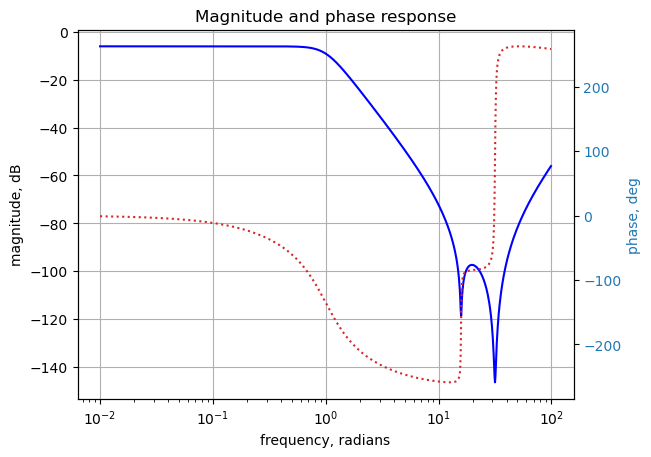

In [93]:
x = np.logspace(-2, 2, 1000, endpoint=False) #*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, radians')

plt.semilogx(w, mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w, phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

<!--
Write the impedances for each of the branches of the circuit.

Franc's answer walks through the FACTS method

### References

Methods of Design Oriented Analysis](https://www.scribd.com/document/422935307/Methods-of-design-oriented-analysis)

@Middlebrook1992, Methods of Design-Oriented Analysis: The Quadratic Equation Revisited

@Middlebrook1991, Low-entropy expressions: the key to design-oriented analysis

@basso2016, Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling

<!--
Methods of DE~sign-Oriented Analysis: The Quadratic Equation Revisited
@INPROCEEDINGS{Middlebrook1992,
  author={Middlebrook, R.D.},
  booktitle={Proceedings. Twenty-Second Annual conference Frontiers in Education}, 
  title={Methods of Design-Oriented Analysis: The Quadratic Equation Revisited}, 
  year={1992},
  pages={95-102},
  doi={10.1109/FIE.1992.683365}
}

Low-entropy expressions: the key to design-oriented analysis
@INPROCEEDINGS{Middlebrook1991,
  author={Middlebrook, R.D.},
  booktitle={Proceedings Frontiers in Education Twenty-First Annual Conference. Engineering Education in a New World Order}, 
  title={Low-entropy expressions: the key to design-oriented analysis}, 
  year={1991},
  pages={399-403},
  doi={10.1109/FIE.1991.187513}
}

@online{basso2016,
    author = {Basso, Christophe},
    title = {Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling},
    url  = {https://www.powersimtof.com/Downloads/PPTs/Chris%20Basso%20APEC%20seminar%202016.pdf},
    year={2016},
    addendum = {accessed 12 Feb 2024}
}


[Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling](https://www.powersimtof.com/Downloads/PPTs/Chris%20Basso%20APEC%20seminar%202016.pdf)

-->

## Re-work of @user347817's solution
The solution provided by @user347817 is not a solution that following the FACTS method. He calculates the transfer function based on the ratio of the impedances of a voltage divider. @fig-pi-filter-franc, shows the orginal circuit re-drawn with the branches replaced by their transformed impedances.

![Pi filter schematic with branch impedances replaced by Z1, Z2 and Z3](Pi-Filter-franc.png){#fig-pi-filter-franc}  

The components for the branches are replace by Z1, Z2 and Z3.

```
Z1 = series connection of R1, L1 and C1

Z2 = series connection of Ra and (L2 || C2 || R2)

Z3 = series connection of R3, L3 and C3

Z4 = Z3 || R_out
```

The following defines the SymPy symbols used in the calculations. The function [symbols](https://docs.sympy.org/latest/tutorials/intro-tutorial/gotchas.html#symbols) takes a string of variable names separated by spaces or commas, and creates Symbols out of them.

In [94]:
L1, L2, L3, R1, R2, R3, Ra, R, R_out, R_in, C1, C2, C3, s, V1 = symbols('L1, L2, L3, R1, R2, R3, Ra, R, R_out, R_in, C1, C2, C3, s, V1')

### Branches of the circuit
Z1 is the series connection of R1, C1 and L1.

In [95]:
Z1_sym = R1+s*L1+1/(s*C1)
Z1_sym

Z2 is the series connection of Ra and the paralle connection of R2, L2 and C2

In [96]:
Z2_sym = (Ra+1/(1/(1/(s*C2)) + 1/(s*L2) + 1/R2))
Z2_sym

Z3 is the series connection of R3, L3 and C3

In [97]:
Z3_sym = R3+s*L3+1/(s*C3)
Z3_sym

Z4 is the parallel combination of R_out and Z3. 

Z4 = R_out || Z3

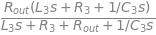

In [98]:
Z4_sym = R_out*Z3_sym/(R_out+Z3_sym)
Z4_sym

@user347817 provided a MatCAD like set of calculations. Using "||" to indicate a parallel combination of components and a "+" to indicate a series combination of componets, some of his calculations are shown here:  

$Z_1 = R_2 + sL_1 + \frac {1}{sC_1}$  
$Z_2 = R_6 + R_3 || sL_2 || \frac {1}{sC_2}$    
$Z_3 = R_4 + sL_3 + \frac {1}{sC_3}$  
$Z_4 = Z_3 || R_2$  

$V_1 = \frac {(Z_1 || (Z_2+Z_4))} {(R_1+Z_1 || (Z_2+Z_4))} V_i$  

$V_o = \frac {Z_4} {(Z_4+Z_2)} V_1$

$V_o = \frac {Z_4} {(Z_4+Z_2)} \frac {(Z_1 || (Z_2+Z_4))} {(R_1+Z_1 || (Z_2+Z_4))} V_i$ 

In [99]:
Z1, Z2, Z3, Z4, R_in, R_out, V1 = symbols('Z1, Z2, Z3, Z4, R_in, R_out, V1')

Zx is the parallel combination of Z1, Z2 and Z4.

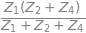

In [100]:
Zx = Z1*(Z2+Z4)/(Z1+Z2+Z4)
Zx

The voltage at node 1 is calculated by using the voltage divider formula for Zx and Rin.

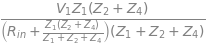

In [101]:
v_node1 = V1*Zx/(R_in+Zx)
v_node1

Vout is the voltage divider of Z2 and Z4.

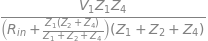

In [102]:
V_out =  v_node1*Z4/(Z2+Z4)
V_out

The trasfer function is Vout/Vin.
H_franc_sym

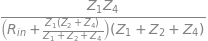

In [103]:
H_franc_z = V_out/V1
H_franc_z

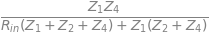

In [104]:
H_franc_z.simplify()

Repeating the calculations from above, but using symbolic expressions for Z1, Z2, Z3 and Z4.

Zx is the combination of Z's looking towards the output of the filter.
Zx = Z1 || (Z2+Z4)

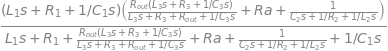

In [105]:
Zx_sym = Z1_sym*(Z2_sym+Z4_sym)/(Z1_sym+Z2_sym+Z4_sym)
Zx_sym

The voltage at node 1 is
```
v_node1 = V1*Zx/(R_in+Zx)
```

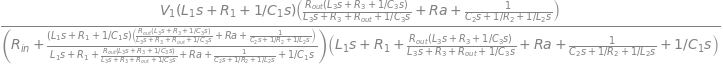

In [106]:
v_node1_sym = V1*Zx_sym/(R_in+Zx_sym)
v_node1_sym

V_out is the output of the voltage divider circuit formed by Z2 and Z4

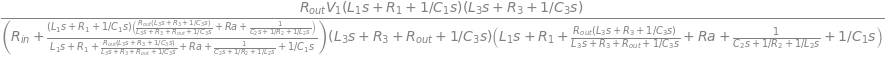

In [107]:
V_out_sym =  v_node1_sym*Z4_sym/(Z2_sym+Z4_sym)
V_out_sym

### H_franc_sym
The transfer function as determined by taking the impedance of branches and combining by series and parallel combinations can be expressed below.

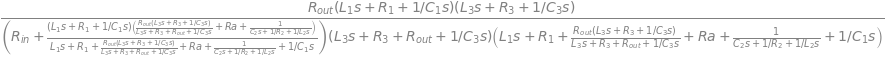

In [108]:
H_franc_sym = V_out_sym/V1
H_franc_sym

The expression above, probably comes closest to the reults that would be obtained from a FACTS analysis. 

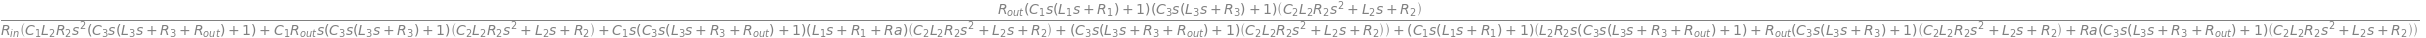

In [109]:
H_franc_sym_1a = H_franc_sym.simplify()
H_franc_sym_1a

In [110]:
n, d = fraction(H_franc_sym_1a)
display('numerator', n, 'denominator', d)

'numerator'

'denominator'

Solve for the roots of the numberator.

In [111]:
n.simplify().expand()

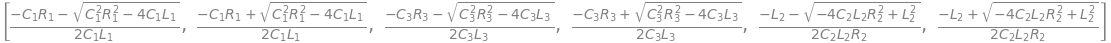

In [112]:
solve(n.simplify().expand(),s)

We can see that there are six zeros in the transfer function. Here can see what components are influncing the zeros. Once of the gaols of the FACTS method was to determine the zeros of the network.

Solve for the roots of the denominator

In [113]:
d.simplify().expand().together()

In [114]:
#solve(d,s)

SymPy could not find a solution for roots of denominator.

### Use numerical values for components
The element vaules can be put into the equation.

In [115]:
element_values

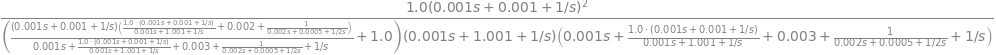

In [116]:
H_franc = H_franc_sym.subs(element_values)
H_franc

Simplifying the expression.

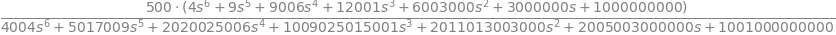

In [117]:
H_franc = H_franc.nsimplify().simplify().expand().together()
H_franc

### Poles and zeros of the low pass transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [118]:
H_franc_num, H_franc_denom = fraction(H_franc) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [119]:
# convert symbolic to NumPy polynomial
a = np.array(Poly(H_franc_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_franc_denom, s).all_coeffs(), dtype=float)
franc_sys = signal.TransferFunction(a,b)

In [120]:
franc_sys_zeros = np.roots(franc_sys.num)
franc_sys_poles = np.roots(franc_sys.den)

### Pole zero plot
The poles and zeros of the function are plotted on the complex plane.

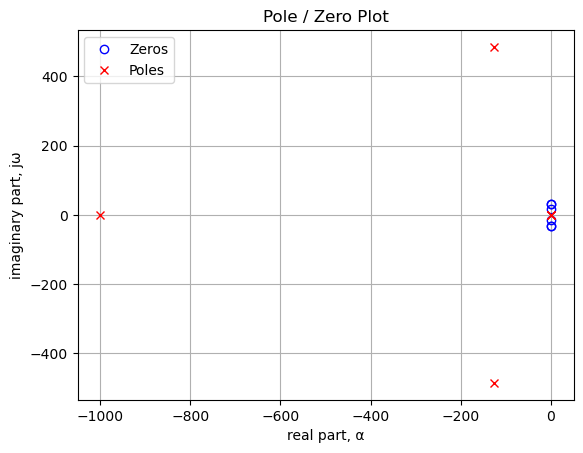

In [121]:
plt.plot(np.real(franc_sys_zeros), np.imag(franc_sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(franc_sys_poles), np.imag(franc_sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
#plt.ylim((-2,2))
#plt.xlim((-2,0))
plt.grid()
plt.show()

Printing the value of the poles and zeros in radians per second.

In [122]:
print('number of zeros: {:d}'.format(len(franc_sys_zeros)))
for i in franc_sys_zeros:
    print('{:,.3f} rad/s'.format(i))

number of zeros: 6
-0.500+31.619j rad/s
-0.500-31.619j rad/s
-0.500+31.619j rad/s
-0.500-31.619j rad/s
-0.125+15.811j rad/s
-0.125-15.811j rad/s


In [123]:
print('number of poles: {:d}'.format(len(franc_sys_poles)))
for i in franc_sys_poles:
    print('{:,.3f} rad/s'.format(i))

number of poles: 6
-1,000.000+0.000j rad/s
-125.501+485.024j rad/s
-125.501-485.024j rad/s
-1.000+0.000j rad/s
-0.499+0.865j rad/s
-0.499-0.865j rad/s


### Bode plot
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. 

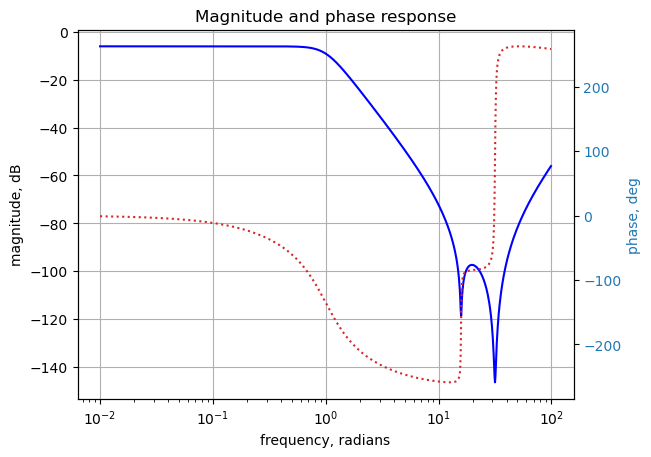

In [124]:
x = np.logspace(-2, 2, 1000, endpoint=False) #*2*np.pi
w_franc, mag_franc, phase_franc = signal.bode(franc_sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, radians')

plt.semilogx(w_franc, mag_franc,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w_franc, phase_franc,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

## Comapring solutions

Load the csv file from LTSpice.

In [125]:
fn = 'Pi-Filter-LTSpice.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',',skip_header=1)

# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

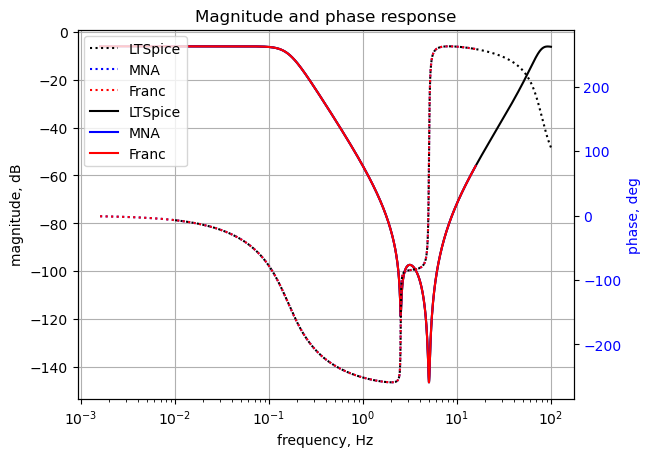

In [126]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-k')    # LTSpice magnitude plot
plt.semilogx(w/(2*np.pi), mag,'-b')    # MNA magnitude plot
plt.semilogx(w_franc/(2*np.pi), mag_franc,'-r')    # FACTS magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'b'

plt.semilogx(frequency, np.unwrap(2*np.angle(voltage)/2) *180/np.pi,':',color='k',label='LTSpice')  # LTSpice phase plot
plt.semilogx(w/(2*np.pi), phase,':',color='b',label='MNA')  # MNA phase plot
plt.semilogx(w_franc/(2*np.pi), phase_franc,':',color='r',label='Franc')  # FACTS phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

ax2.plot(np.NaN, np.NaN, color='k', label='LTSpice')
ax2.plot(np.NaN, np.NaN, color='b', label='MNA')
ax2.plot(np.NaN, np.NaN, color='r', label='Franc')

plt.legend()
plt.title('Magnitude and phase response')
plt.show()

LTSpice, SMNA and Franc results agree. 

## Community answers
Both comunity answers did not provide a solution based on the FACTS method. Missing was the steps to extract the time constants of the circuit and from there find the zeros of the network. 

The answer from @user347817 replaces each leg of the filter with Z's and then uses series and parallel equalivent conbinations. As shown above this analysis provides only an approximate solution and probably would not cut the mustard in an acedemic or critical design reviwe.  

The answer provided by Tesla23 is also suspect and seems wrong. The following calculations walk through some of his steps.

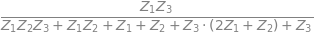

In [127]:
H_telsa23 = ((R*Z1*Z3)/(R*((Z2+2*Z1)*Z3 + Z1*Z2) + R**2*(Z3+Z2+Z1) + Z1*Z2*Z3)).subs({R:1})
H_telsa23

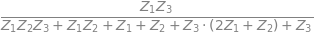

In [128]:
H_telsa23.simplify()

Comparing the results above to my rendition of FACTS, you can see that they are not the same.

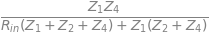

In [129]:
H_franc_z.simplify()

It's not worth my time to analyze Tesla23's answer to determine why there is a difference, especially since the thrust of these notebooks is MNA.

## Reduced complexity circuit with source and load impedance
The following analysis finds the transfer function for the circuit below. The parasitic components have been removed from the schematic. The circuit is now a third order circuit. As shown below the poles of the transferfunction expressed symbolically are long and complex. It's hard to see how a FACTS solution would yield design oriented results. 

![Pi filter with out parasitics](Pi-Filter-FACTS-Simplified.png){#fig-pi-filter-simplified}  


In [130]:
net_list = '''
V1 3 0 1
R_in 1 3 1
R_out 2 0 1
C1 1 0 1
C2 2 0 1
L1 1 2 1
'''

### Call the symbolic modified nodal analysis function


In [131]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

The network equations for the circuit can be obtained from the A, X and Z values returned from the smna function. The A, X and Z are formulated into equations and displayed below. Markdown is an IPython function and latex is a SymPy printing function.

In [132]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = I_{L1} + v_{1} \left(C_{1} s + \frac{1}{R_{in}}\right) - \frac{v_{3}}{R_{in}}$<br>$0 = - I_{L1} + v_{2} \left(C_{2} s + \frac{1}{R_{out}}\right)$<br>$0 = I_{V1} - \frac{v_{1}}{R_{in}} + \frac{v_{3}}{R_{in}}$<br>$V_{1} = v_{3}$<br>$0 = - I_{L1} L_{1} s + v_{1} - v_{2}$<br>

Turn the free symbols into SymPy variables.

In [133]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

### Symbolic solution
The network equations can be solved symbolically. 

In [134]:
U_sym = solve(NE_sym,X)

Display the symbolic solution

In [135]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = \frac{C_{2} L_{1} R_{out} V_{1} s^{2} + L_{1} V_{1} s + R_{out} V_{1}}{C_{1} C_{2} L_{1} R_{in} R_{out} s^{3} + C_{1} L_{1} R_{in} s^{2} + C_{1} R_{in} R_{out} s + C_{2} L_{1} R_{out} s^{2} + C_{2} R_{in} R_{out} s + L_{1} s + R_{in} + R_{out}}$<br>$v_{2} = \frac{R_{out} V_{1}}{C_{1} C_{2} L_{1} R_{in} R_{out} s^{3} + C_{1} L_{1} R_{in} s^{2} + C_{1} R_{in} R_{out} s + C_{2} L_{1} R_{out} s^{2} + C_{2} R_{in} R_{out} s + L_{1} s + R_{in} + R_{out}}$<br>$v_{3} = V_{1}$<br>$I_{V1} = \frac{- C_{1} C_{2} L_{1} R_{out} V_{1} s^{3} - C_{1} L_{1} V_{1} s^{2} - C_{1} R_{out} V_{1} s - C_{2} R_{out} V_{1} s - V_{1}}{C_{1} C_{2} L_{1} R_{in} R_{out} s^{3} + C_{1} L_{1} R_{in} s^{2} + C_{1} R_{in} R_{out} s + C_{2} L_{1} R_{out} s^{2} + C_{2} R_{in} R_{out} s + L_{1} s + R_{in} + R_{out}}$<br>$I_{L1} = \frac{C_{2} R_{out} V_{1} s + V_{1}}{C_{1} C_{2} L_{1} R_{in} R_{out} s^{3} + C_{1} L_{1} R_{in} s^{2} + C_{1} R_{in} R_{out} s + C_{2} L_{1} R_{out} s^{2} + C_{2} R_{in} R_{out} s + L_{1} s + R_{in} + R_{out}}$<br>

### Transfer function

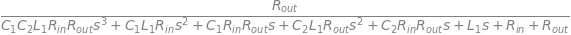

In [136]:
H_sym_1  = (U_sym[v2]/U_sym[v3]).simplify()
H_sym_1

In [137]:
n, d = fraction(H_sym_1)
display('numerator', n, 'denominator', d)

'numerator'

'denominator'

Solve for the roots of the denominator

In [138]:
d.simplify().expand().together()
#d.simplify().expand()

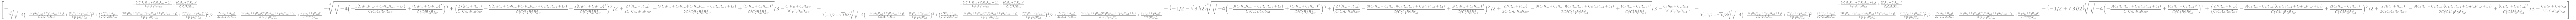

In [139]:
solve(d,s)

## Summary

- FACTS method is applicable to low order circuits, since for higher order circuits, say N greater than 2 or 3, N-element Extra Element Theorem requires a lot of steps. The resultant analytical expression might be useful and insightful since series and parallel combinations of components and their grouping, or the circuit's time constants, could be preserived in a relational way in the equation. 
  - In @fig-pi-filter, a 6th order circuit, analytic expressions for the roots of the poles and zeros would be very long and of doubious utility. 
  - The brute force solution for the transfer function of @fig-pi-filter, was a long expression. SymPy could solve for the roots of the numerator, but not for the denominator.
- The assurtion that brute force is complicated and error prone is not true if computer algebra tools are used. Some of the same proported advantages of using FACTS, that is, less math, less algebra and some insight into the circuit operation are available with SMNA, since the computer does all the heavy lifting.
- Python based symbolic MNA code provides an easy and less error prone method of obtaining analytic solutions to circuit problems. 
